# ft_linear_regression Evaluation Notebook

## Gradient descent (Optimization Algorithm)

### Concepts
- mathematical concepts
  1. algebra
  2. calculus (differential first order, second order gradient, chain-rule)
  3. linear algebra and matrix operations - for multivariate regression (Not applicable for this exercise, just additional info)
- gradient descent and loss/cost function. Loss function have to meet following assumptions:
  1. convex
  2. have to be differentiable at every point
- formula \$\theta_{n+1}= \theta_{n} - \alpha\nabla f(\theta_{n})\$  note: \$\nabla f(\theta_{n})\$ is the gradient for cost function
  1. learning rate \$\alpha\$
     - too high learning rate causes it to 'jump around' and maybe diverge
     - too low a learning rate take too long to converge
- what is regression analysis
  1) simple linear regression
  2) multiple regression
  3) polynomial regression
- simple regression analysis can be solved algebraicly, multivariate can be solved using matrix (inverse matrix and determinant), both using Ordinary Least Square(OLS). Gradient descent is an iterative model and significantly less expensive especially for complex models. However gradient descent subject to alot of constraint.
  1) algebraic equation with differential \$\sum Y = na + b \sum X, ∑XY = a∑X + b∑X2\$ >> \$b = (n\sum xy - \sum y \sum x)/n\sum x^2 - (\sum x)^2\$, \$a = (\sum y - b\sum x)/n\$
  3) matrix equation \$b = (X'X)^{-1}(X'y)\$
- Gradient descent constraint includes:
  1) local minima is not global minima
  2) choosing optimal learning rate
  3) starting points
  4) critical points is not local minima

## Mean Square Error as cost function for linear regression


**MSE definition**

\$ MSE = \dfrac{\sum (y' - y)^2}{n}\$ => reconcile to subject.pdf for price/km update function with partial derivation using chain rule

\$ MSE = \dfrac{\sum ((\theta_0 + \theta_1 (mileage)) - price)^2}{n}\$

___

*Since we have 2 independent variables that make up the MSE, we perform gradient descent for each of them separately using partial derivatives to find the local minima of MSE for each variable*

1) partial differentiation for \$ theta_0\$: The gradient for MSE w.r.t to \$ \theta_0 \$

Using chain rule:
\$ \dfrac{\delta (MSE)}{\delta (\theta_0)} \$ = \$ (2)\dfrac{\sum ((\theta_0 + \theta_1 (mileage)) - price)(1)}{n} \$

(2) can be subsumed within learning rate hence final gradient formula is:

\$ \dfrac{\delta (MSE)}{\delta (\theta_0)} \$ = \$ \dfrac{\sum ((\theta_0 + \theta_1 (mileage)) - price)(1)}{n} \$

2) partial differentiation for \$ theta_1\$: The gradient for MSE w.r.t to \$ \theta_1 \$
   
Using chain rule:
\$ \dfrac{\delta (MSE)}{\delta (\theta_1)} \$ = \$ (2)\dfrac{\sum ((\theta_0 + \theta_1 (mileage)) - price)(mileage)}{n} \$

same as above, final gradient formula is:

\$ \dfrac{\delta (MSE)}{\delta (\theta_1)} \$ = \$ \dfrac{\sum ((\theta_0 + \theta_1 (mileage)) - price)(mileage)}{n} \$



## Dataset of price vs km provided in subject

## Plot illustration of GD using the cost function(MSE) for simple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML
import sys

plot_range = 50
%matplotlib widget
data = pd.read_csv("./data.csv")
data

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


### Gradient Descent Update done separate

#### Calculate \$ \theta_0 \$ with learning rate of 0.1. Starting position \$\theta_0 = 0 \$ and \$\theta_1 = 0 \$. Can be any random position.

theta0: 6331


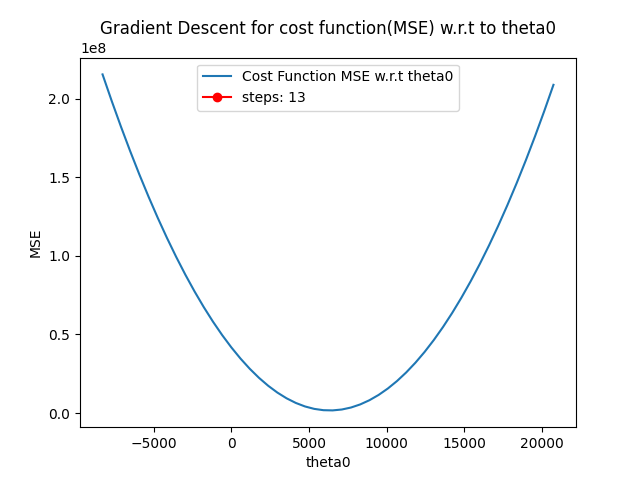

In [6]:
#set learning rate and initial theta0 and theta1
learningRate = 0.5
theta0 = 0
theta1 = 0
steps_intercept = 0
denominator = 1000

fig, axes = plt.subplots()
axes.set_title("Gradient Descent for cost function(MSE) w.r.t to theta0")
axes.set_ylabel("MSE")
axes.set_xlabel("theta0")
#generate a range of intercept using mean of intercept as a basis
intercept = np.linspace(-np.max(data["price"]), np.max(data["price"]*2.5), plot_range)
rangeY = []
def MSE_cal_intercept(x):
    return np.mean(((x + (theta1 * data["km"] / denominator )) - data["price"])**2)
    
for x in intercept:
    rangeY.append(MSE_cal_intercept(x))

axes.plot(intercept, rangeY, label="Cost Function MSE w.r.t theta0")
x = []
y = []


def update_theta0():
    global theta0
    global steps_intercept
    global x
    global y
    #gradient descent update based on above formula
    gradient = np.mean((theta0 + (theta1 * data["km"] / denominator)) - data["price"])
    x.append(theta0)
    y.append(MSE_cal_intercept(theta0))
    while abs(gradient) > 1:
        theta0 = theta0 - (learningRate * gradient)
        new_gradient = np.mean((theta0 + (theta1 * data["km"] / denominator)) - data["price"])
        if abs(new_gradient) > abs(gradient) and steps > 15:
            break
        else:
            gradient = new_gradient
        steps_intercept += 1
        x.append(theta0)
        y.append(MSE_cal_intercept(theta0))

update_theta0()
line2D, = axes.plot([], [], marker="o", color="r", label=f"steps: {steps_intercept}")
axes.legend()

def animate(frame):
    line2D.set_xdata(x[:frame])
    line2D.set_ydata(y[:frame])

ani = animation.FuncAnimation(fig, animate, frames=steps_intercept+2, interval=500)
print(f"theta0: {theta0:.0f}")

\$ \theta_0 \$ obtained using GD while keeping \$ \theta_1 = 0 \$ and learning rate (\$ \alpha \$) of 0.1 is **6331** and steps taken is **84**

#### Calculate \$ \theta_1 \$ with learning rate of 0.0001. Starting position \$\theta_0 \$ = 6331 (based on above) and \$\theta_1 = 0 \$.

theta1: -0.004424


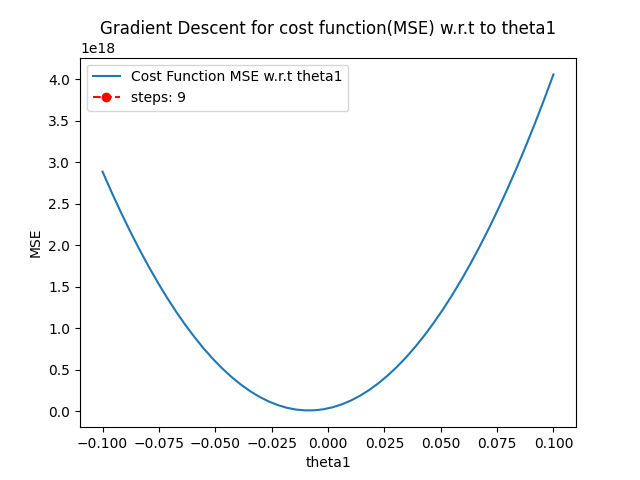

In [4]:
#set learning rate and initial theta0 and theta1
#slope is huge (MSE in relation to unit of theta1, hence learning rate have to be very small)
learningRate_slope = 0.0001
theta0_slope = 6331
theta1_slope = 0
steps_slope = 0
denominator = 1000


fig1, axes1 = plt.subplots()
axes1.set_title("Gradient Descent for cost function(MSE) w.r.t to theta1")
axes1.set_ylabel("MSE")
axes1.set_xlabel("theta1")
#generate a range of slope by looking at plot and approximating the slope
slope = np.linspace(-0.1, 0.1, plot_range)
rangeY_slope = []

def MSE_cal_slope(x):
    return np.mean((((theta0_slope + (x * data["km"] )) - data["price"])*(data["km"]))**2)
    
for x in slope:
    rangeY_slope.append(MSE_cal_slope(x))


axes1.plot(slope, rangeY_slope, label="Cost Function MSE w.r.t theta1")
x_slope = []
y_slope = []

def update_theta1():
    global theta1_slope
    global steps_slope
    global x_slope
    global y_slope
    #gradient descent update based on above formula
    gradient = np.mean(((theta0_slope + (theta1_slope * data["km"] / denominator)) - data["price"])*data["km"] / denominator)
    x_slope.append(theta1_slope)
    y_slope.append(MSE_cal_slope(theta1_slope))
    while abs(gradient) > 1:
        theta1_slope = theta1_slope - (learningRate_slope * gradient)
        new_gradient = np.mean(((theta0_slope + (theta1_slope * data["km"] / denominator)) - data["price"])*data["km"] / denominator)
        if abs(new_gradient) > abs(gradient) and steps_slope > 15:
            break
        else:
            gradient = new_gradient
        steps_slope += 1
        x_slope.append(theta1_slope / 1000)
        y_slope.append(MSE_cal_slope(theta1_slope / 1000))


update_theta1()
line2D_slope, = axes1.plot([], [], "o--r", label=f"steps: {steps_slope}")
axes1.legend()

def animate_slope(frame):
    line2D_slope.set_xdata(x_slope[:frame])
    line2D_slope.set_ydata(y_slope[:frame])

ani_slope = animation.FuncAnimation(fig1, animate_slope, frames=steps_slope+2, interval=500)
print(f"theta1: {theta1_slope/1000:.6f}")

\$ \theta_1 \$ obtained using GD while keeping \$ \theta_0 \$ = 6331 from results above and learning rate (\$ \alpha \$) of 0.0001 is **0.004424** and steps taken is **9**

### Gradient Descent Update done together

theta0: 8500
theta1: -0.021449


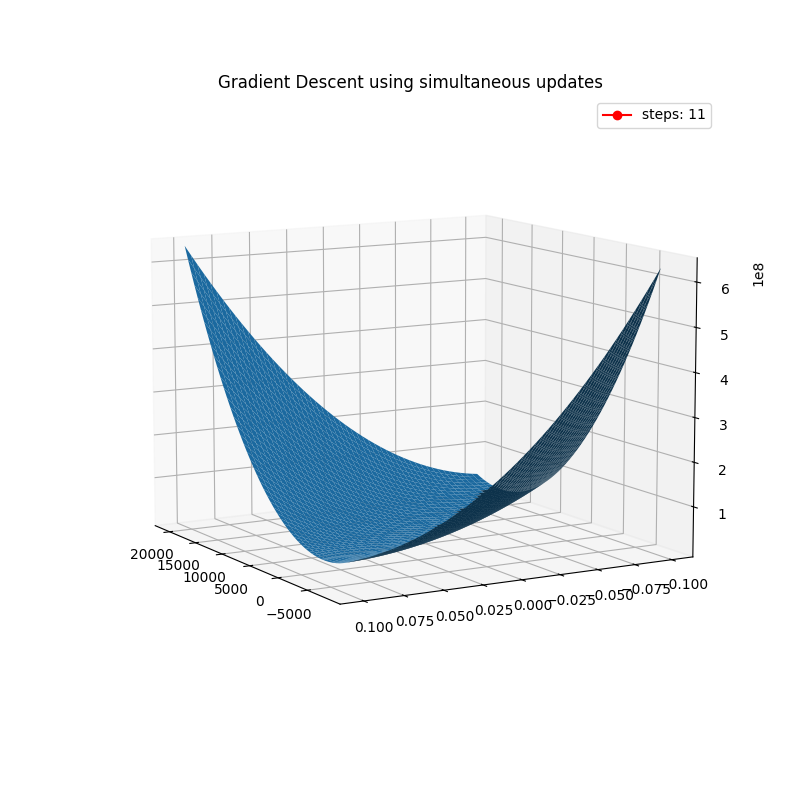

In [5]:
fig2 = plt.figure(figsize=(8,8))
axes2 = fig2.add_subplot(projection='3d')

X, Y = np.meshgrid(intercept, slope)
Z = np.zeros((plot_range, plot_range))

for i in range(plot_range):
    for j in range(plot_range):
        Z[i][j] = np.mean(((X[i][j] + (Y[i][j] * data["km"])) - data["price"])**2)

axes2.set_title("Gradient Descent using simultaneous updates")
axes2.view_init(elev=10, azim=150)
axes2.plot_surface(X, Y, Z,)

theta0_3d = 0
theta1_3d = 0
x_axis_3d = []
y_axis_3d = []
z_axis_3d = []
steps_3d = 0
denominator = 1000
learningRate_3d_theta0 = 1
learningRate_3d_theta1 = 0.0005

def MSE_3d_cal(x,y):
     return np.mean(((x + (y * data["km"] / denominator )) - data["price"])**2)

def update_theta_3d():
    global theta0_3d
    global theta1_3d
    global x_axis_3d
    global y_axis_3d
    global z_axis_3d
    global steps_3d
    normalized_km = data["km"]/denominator
    gradient = np.mean((theta0_3d + (theta1_3d * normalized_km)) - data["price"])
    gradient2 = np.mean(((theta0_3d + (theta1_3d * normalized_km)) - data["price"])*data["km"] / denominator)
    x_axis_3d.append(theta0_3d)
    y_axis_3d.append(theta1_3d / denominator)
    z_axis_3d.append(MSE_3d_cal(theta0_3d,theta1_3d / denominator))
    while abs(gradient) > 1 or abs(gradient2) > 1: 
        gradient = np.mean((theta0_3d + (theta1_3d * normalized_km)) - data["price"])
        new_gradient = gradient
        theta0_3d = theta0_3d - (learningRate_3d_theta0 * gradient)
        gradient2 = np.mean(((theta0_3d + (theta1_3d * normalized_km)) - data["price"])*(normalized_km))
        new_gradient2 = gradient2
        theta1_3d = theta1_3d - (learningRate_3d_theta1 * gradient2)
        if (abs(new_gradient) > abs(gradient) or abs(new_gradient2) > abs(gradient2)) and steps_3d > 15:
            break
        steps_3d += 1
        x_axis_3d.append(theta0_3d)
        y_axis_3d.append(theta1_3d / denominator)
        z_axis_3d.append(MSE_3d_cal(theta0_3d,theta1_3d / denominator))
    

update_theta_3d()
line3D, = axes2.plot([], [], [],marker="o", color="r", label=f"steps: {steps_3d}", zorder=10)

axes2.legend()

def animate_3d(frame):
    line3D.set_data_3d(x_axis_3d[:frame], y_axis_3d[:frame],z_axis_3d[:frame])

ani_3d = animation.FuncAnimation(fig2, animate_3d, frames=steps_3d+2, interval=500)
print(f"theta0: {theta0_3d:.0f}\ntheta1: {theta1_3d / denominator:.6f}")

## Measurement of Precision of models

### 1) R-squared (COEFFICIENT OF DETERMINATION)

Definition : predicts how much prediction error is eliminated from our model using the regression analysis. Prediction error is variance of model \$\sum (f(km) - price)^2 \$.

Formula = 1 - \$\dfrac{\sum (f(km) - price)^2}{\sum (price - \mu)^2}\$ where \$ 0 < R^2 < 1\$

### 2) Root mean squared deviation (RMSD)

Just the std variation of the residual sum of the model. Absolute value and can be compared across model for precision